<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Выгрузка-библиотек-и-датафрейма" data-toc-modified-id="Выгрузка-библиотек-и-датафрейма-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Выгрузка библиотек и датафрейма</a></span></li><li><span><a href="#Анализ-входных-данных" data-toc-modified-id="Анализ-входных-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Анализ входных данных</a></span></li><li><span><a href="#Ресемплирование" data-toc-modified-id="Ресемплирование-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Ресемплирование</a></span></li><li><span><a href="#Вывод-по-разделу-1" data-toc-modified-id="Вывод-по-разделу-1-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Вывод по разделу 1</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Рассмотрение-скользящего-среднего" data-toc-modified-id="Рассмотрение-скользящего-среднего-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Рассмотрение скользящего среднего</a></span></li><li><span><a href="#Рассмотрение-трендов-и-сезонности" data-toc-modified-id="Рассмотрение-трендов-и-сезонности-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Рассмотрение трендов и сезонности</a></span></li><li><span><a href="#Выводы-по-разделу-2" data-toc-modified-id="Выводы-по-разделу-2-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Выводы по разделу 2</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Подготовка-признаков" data-toc-modified-id="Подготовка-признаков-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Подготовка признаков</a></span></li><li><span><a href="#Подготовка-функции-для-расчета-RMSE" data-toc-modified-id="Подготовка-функции-для-расчета-RMSE-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Подготовка функции для расчета RMSE</a></span></li><li><span><a href="#Модель-LinearRegression" data-toc-modified-id="Модель-LinearRegression-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Модель LinearRegression</a></span></li><li><span><a href="#Модель-RandomForestRegressor" data-toc-modified-id="Модель-RandomForestRegressor-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Модель RandomForestRegressor</a></span></li><li><span><a href="#Модель-DecisionTreeRegressor" data-toc-modified-id="Модель-DecisionTreeRegressor-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Модель DecisionTreeRegressor</a></span></li><li><span><a href="#Выводы-по-разделу-3" data-toc-modified-id="Выводы-по-разделу-3-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Выводы по разделу 3</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Обучение-модели-на-тестовых-данных" data-toc-modified-id="Обучение-модели-на-тестовых-данных-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Обучение модели на тестовых данных</a></span></li><li><span><a href="#Проверка-качества-прогноза" data-toc-modified-id="Проверка-качества-прогноза-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Проверка качества прогноза</a></span></li></ul></li><li><span><a href="#Итоговый-вывод" data-toc-modified-id="Итоговый-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Итоговый вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Нам необходимо построить модель для такого предсказания.

Заказчик установил, чтоо значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

План действий при выполнении исследования:

1. Загрузка данных и выполнение их ресемплирования по одному часу.
2. Анализ данных.
3. Обучение разных моделей с различными гиперпараметрами.Тестовая выборка будет размером 10% от исходных данных.
4. Проверка данных на тестовой выборке и сделать выводы.


## Подготовка 

### Выгрузка библиотек и датафрейма

In [1]:
import pandas as pd
import numpy as np

from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit, cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer

from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('C:/Users/kseni/OneDrive/Desktop/практика/датасеты/taxi.csv', index_col=[0], parse_dates=[0])


### Анализ входных данных

In [4]:
print(data.index.is_monotonic_increasing) #проверка, в хронологическом ли порядке расположены даты и время

True


На выходе получили значение `True`, таким образом наши данные расположены в хронологическом порядке

In [5]:
display('Количество пропусков:', data.isna().sum()) #проверка наличия пропусков в исходных данных
data.info() #получение информации о данных
display(data.head()) #вывод первых 5 строк датафрейма

'Количество пропусков:'

num_orders    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


В данных отствуют пропуски, поэтому можем переходить к дальнейшим исследованиям

Изобразим наш временной ряд на графике

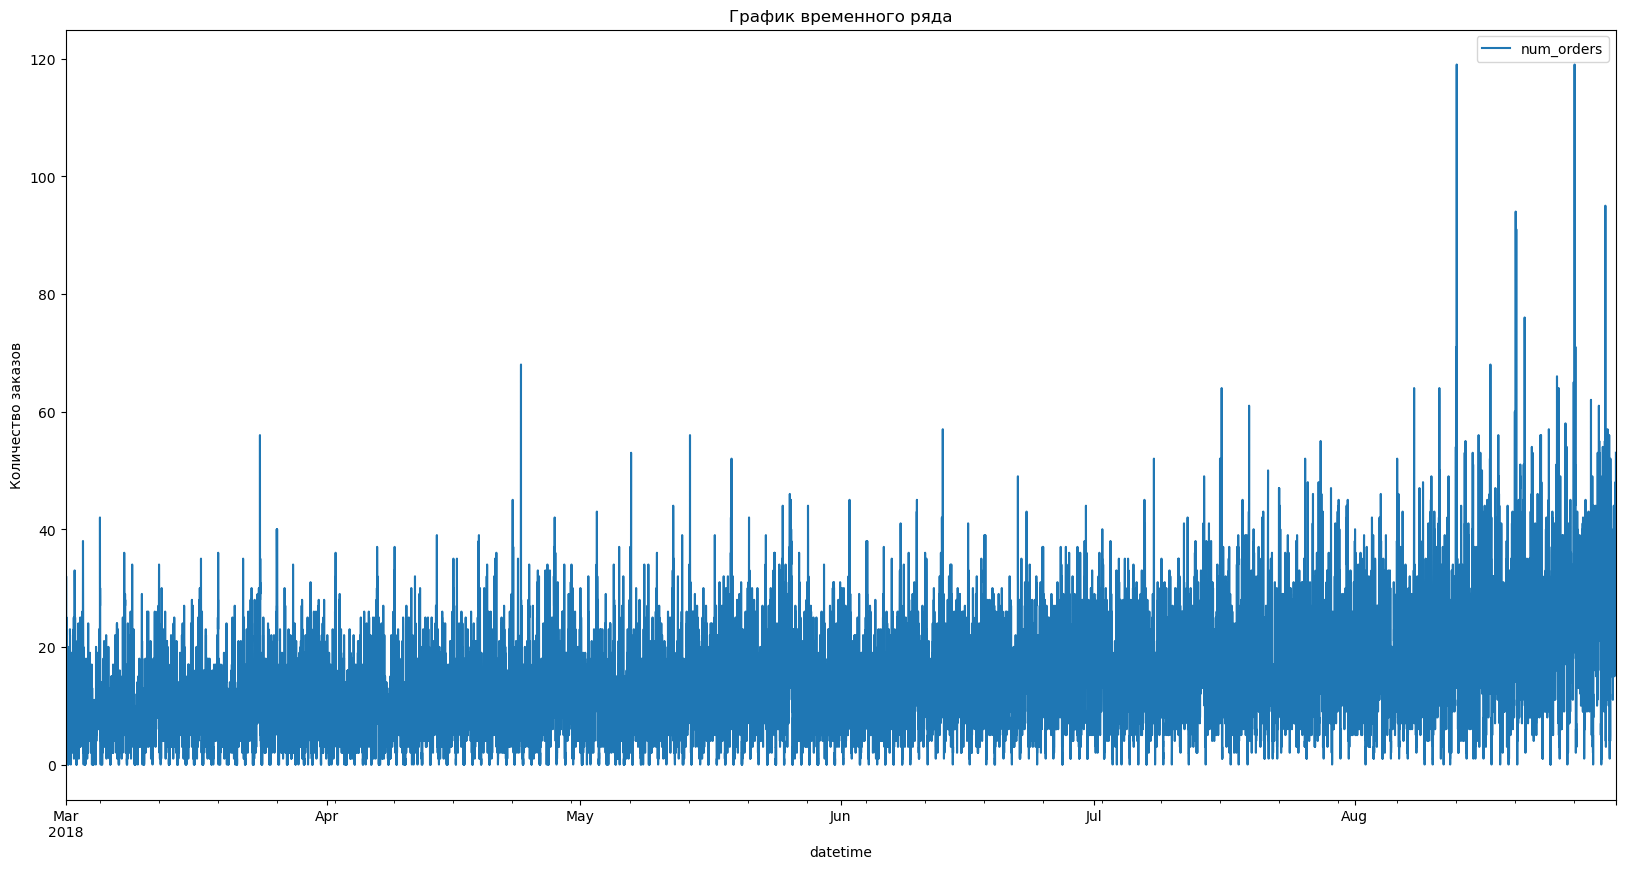

In [6]:
data.plot(figsize=(20, 10))
plt.title('График временного ряда')
plt.ylabel('Количество заказов');

### Ресемплирование

В имеющихся данных временной ряд представлен с интеревалом в 10 минут, выполним рессмемплерирование по 1 часу

In [7]:
data = data.resample('1H').sum()
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


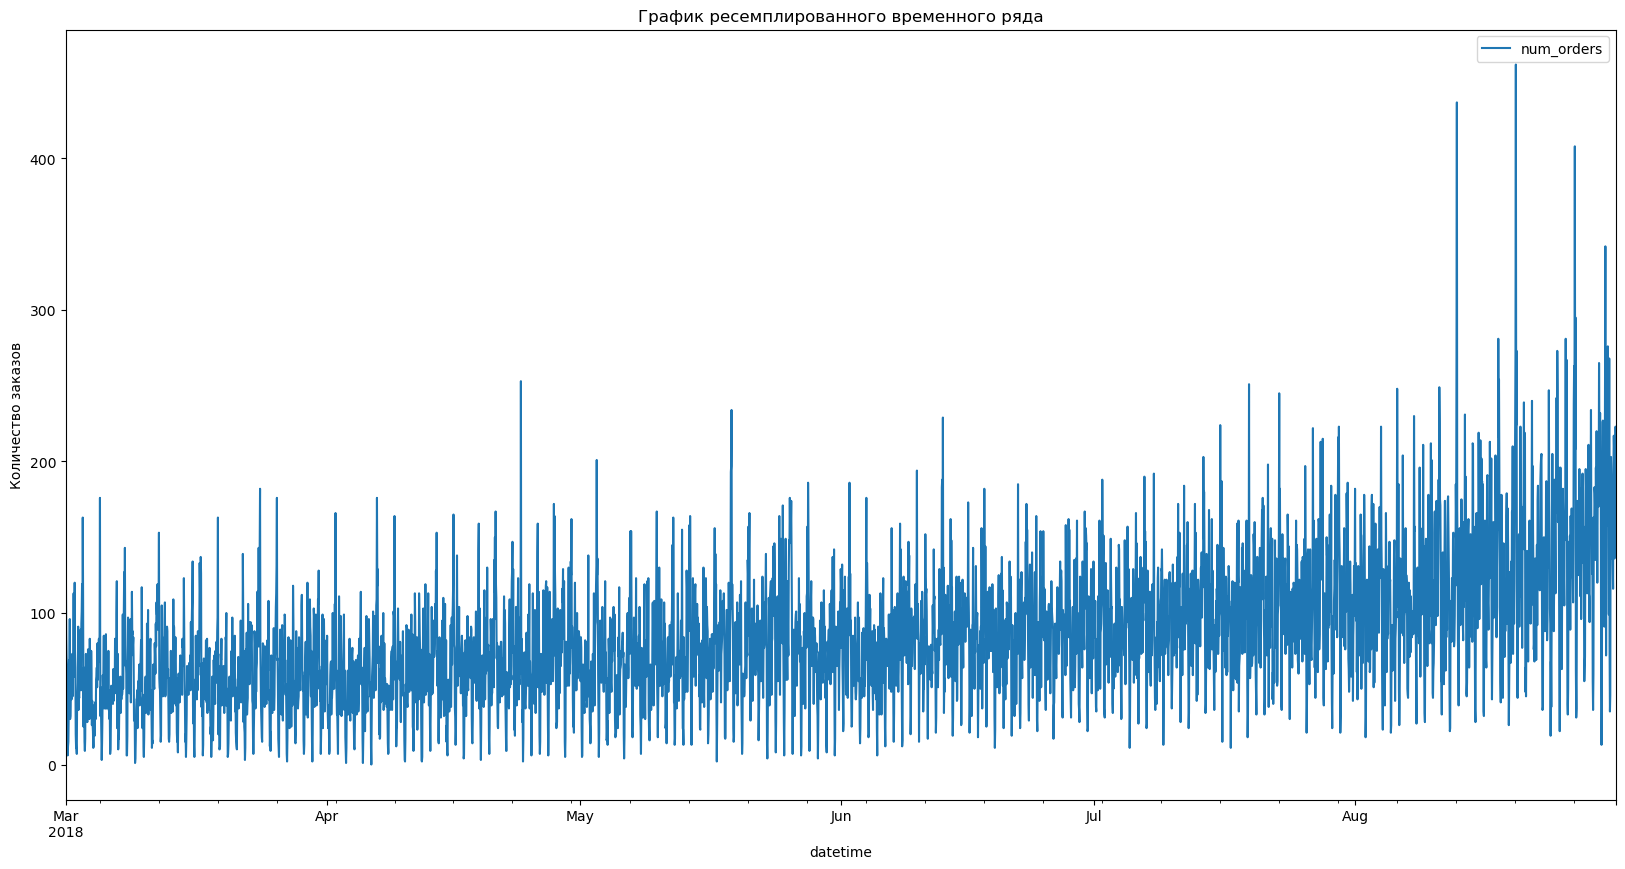

In [8]:
data.plot(figsize=(20, 10))
plt.title('График ресемплированного временного ряда')
plt.ylabel('Количество заказов');

### Вывод по разделу 1

1. Выполнили выгрузку необходимых для исследования библиотек
2. Выгрузили из файла датафрейм. При выгрузке установили индекс таблицы равным столбцу `Datetime`. По полученным данным видно, что на вход имеем датафрейм размером (26496, 1), данные имеются в период с 1 марта 2018 по 31 августа 2018 года. Целевым признаком будет являться число заказов, данные о которых расположены в столбце `num_orders`
3. Проверили в хронологическом ли порядке расположены наши данные. Получили, что данные расположены в хрнологическом порядке и дополнительных манипуляций по сортировке данных не требуется
4. Отобразили график имеющегося временного ряда. 
5. Из полученного графика, а также из таблицы имеем, что данные были расположены с интервалом в 10 минут, поэтому провели ресемплирование по 1 часу

## Анализ

Для анализа скопируем данные в другую переменную и посмотрим скользящее среднее и тренды и сезонность

In [9]:
data_copy = data.copy()
data_copy.shape

(4416, 1)

### Рассмотрение скользящего среднего

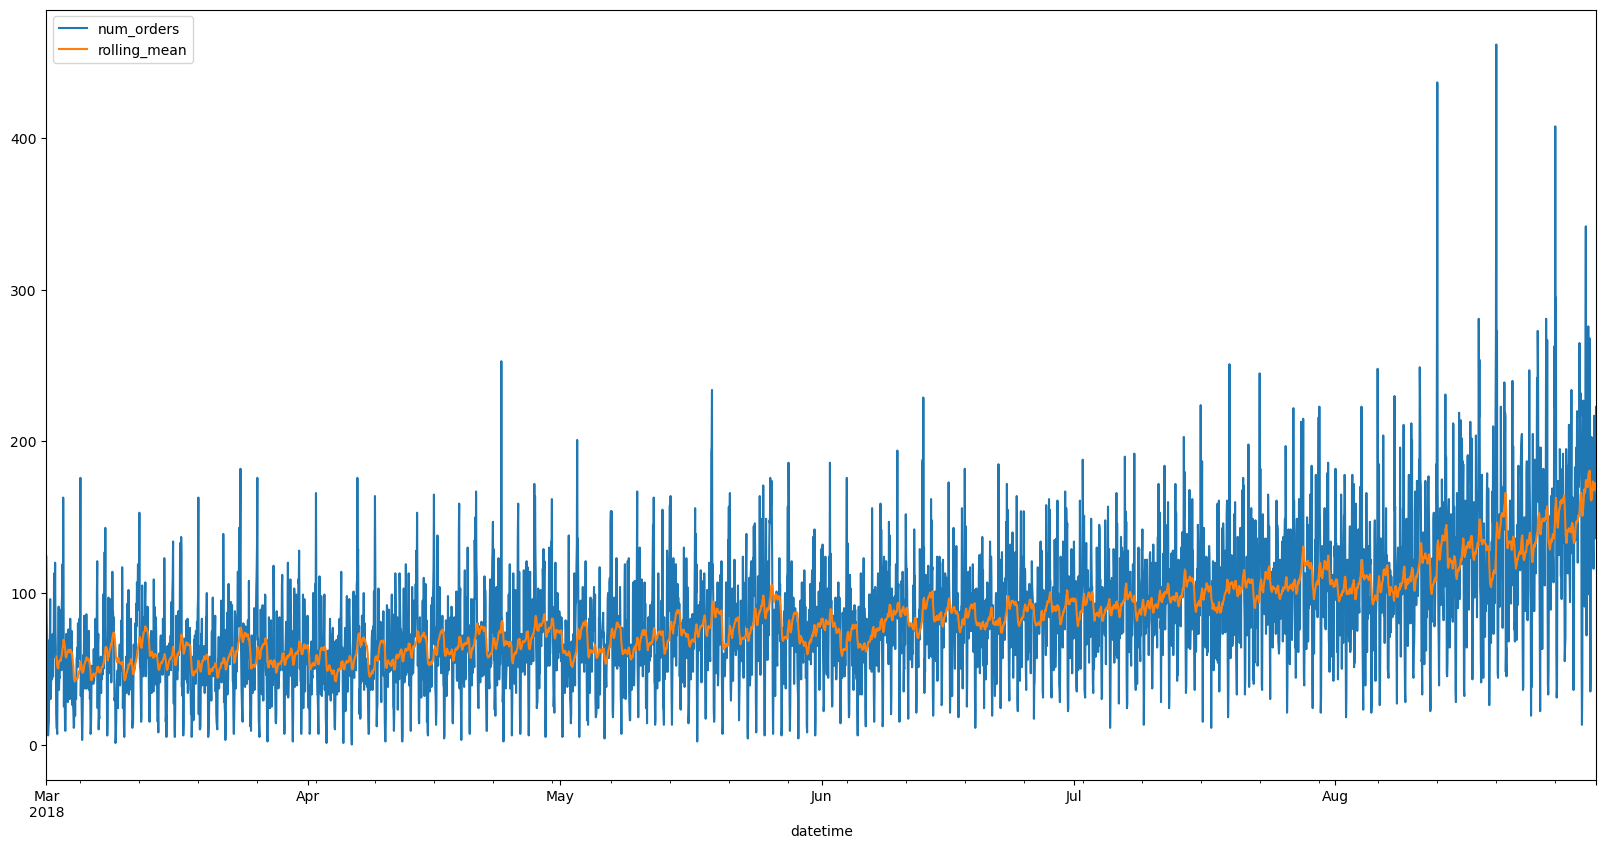

In [10]:
data_copy['rolling_mean'] = data_copy.rolling(30).mean() #для наглядности выбрали размер окна равный 30
data_copy.plot(figsize=(20,10));

### Рассмотрение трендов и сезонности

In [11]:
decomposed = seasonal_decompose(data) #применили функцию seasonal_decompose для разделения на тренды, сезонность и остаток

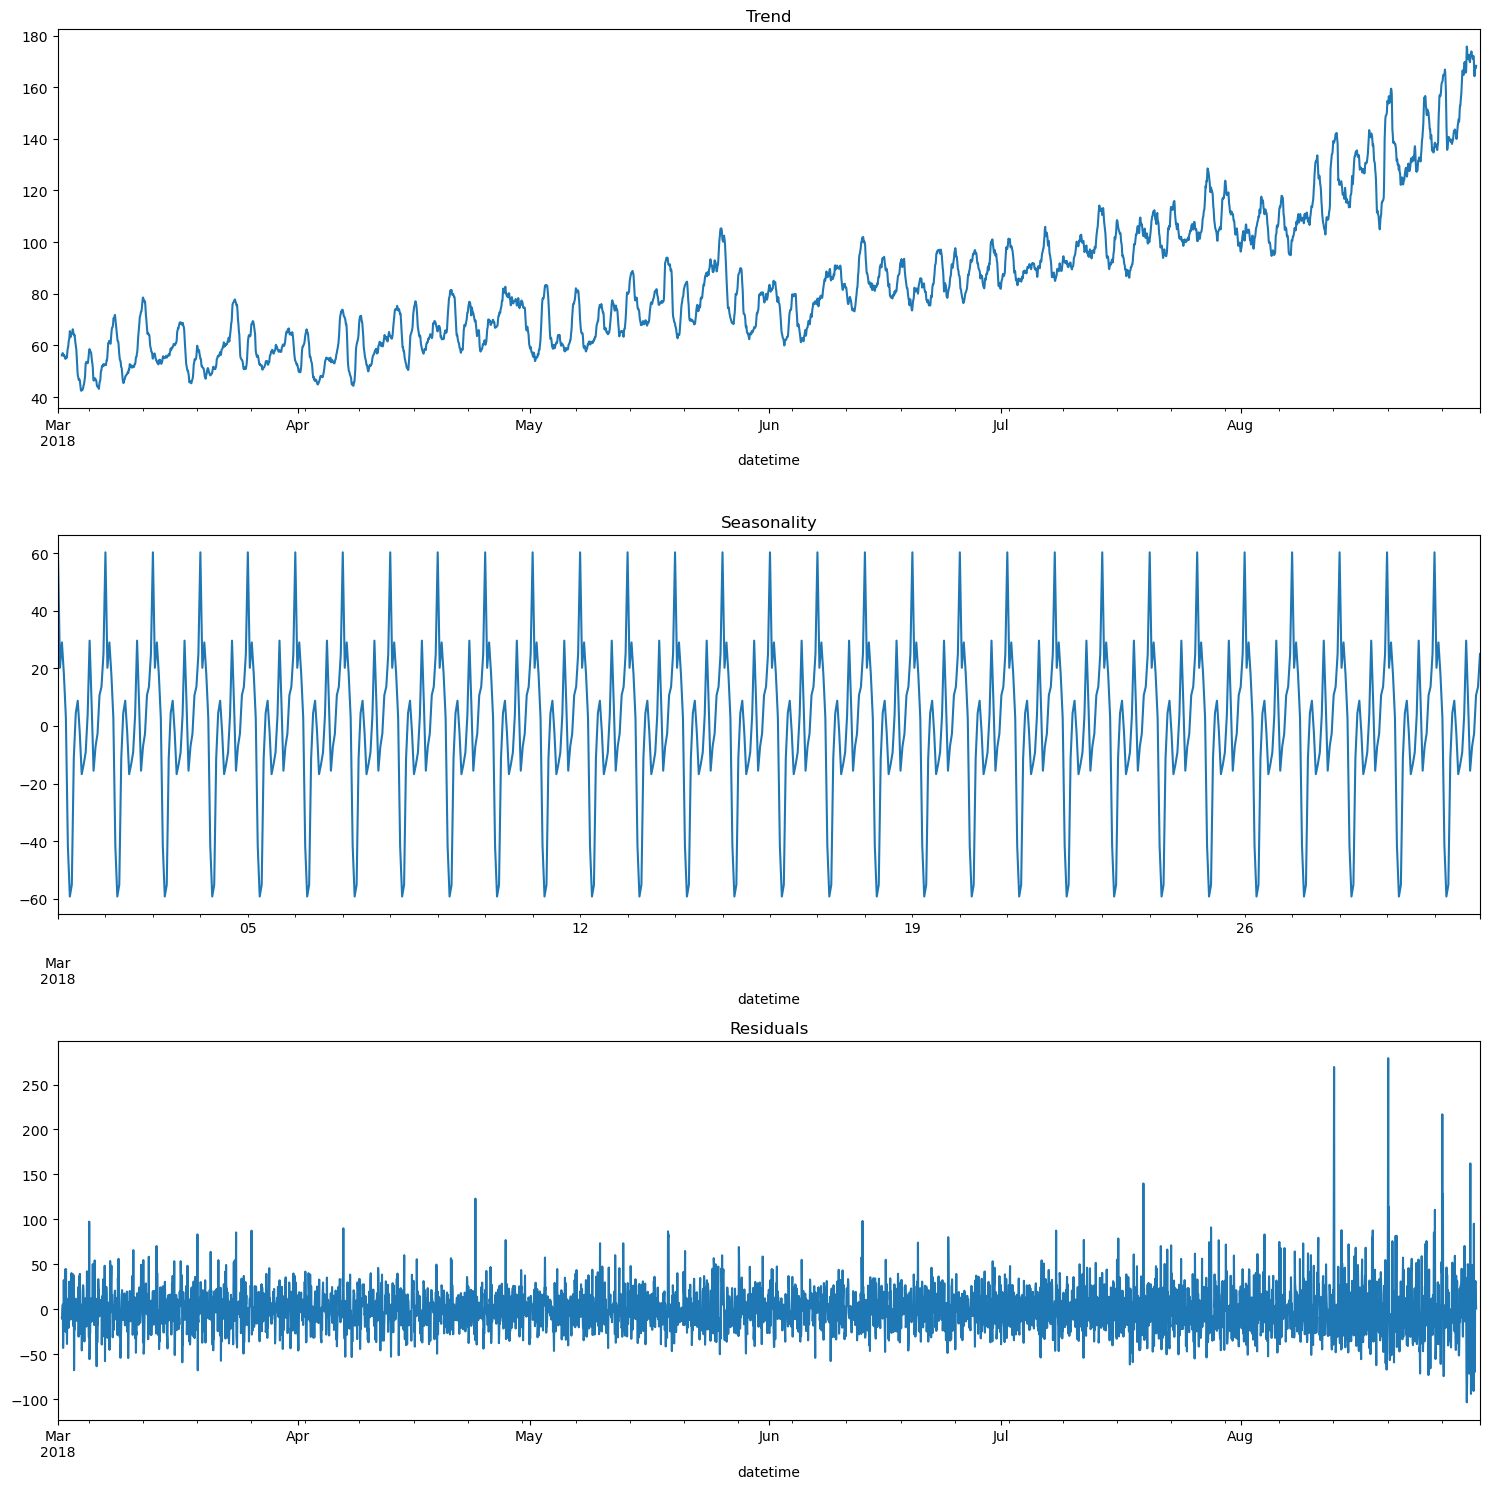

In [12]:
plt.figure(figsize=(6, 8))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca(), figsize=(15,15))
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal['2018-03-01':'2018-03-30'].plot(ax=plt.gca(), figsize=(15,15))
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca(), figsize=(15,15))
plt.title('Residuals')
plt.tight_layout()

Дополнительно, для анализа недельной сезонности, проведем ресемплирование по дням и построим графики

In [13]:
data_day = data.resample('1D').sum()
data_day.head()


,num_orders
datetime,
2018-03-01,1364
2018-03-02,1506
2018-03-03,1290
2018-03-04,1141
2018-03-05,1259


In [14]:
decomposed_day = seasonal_decompose(data_day)

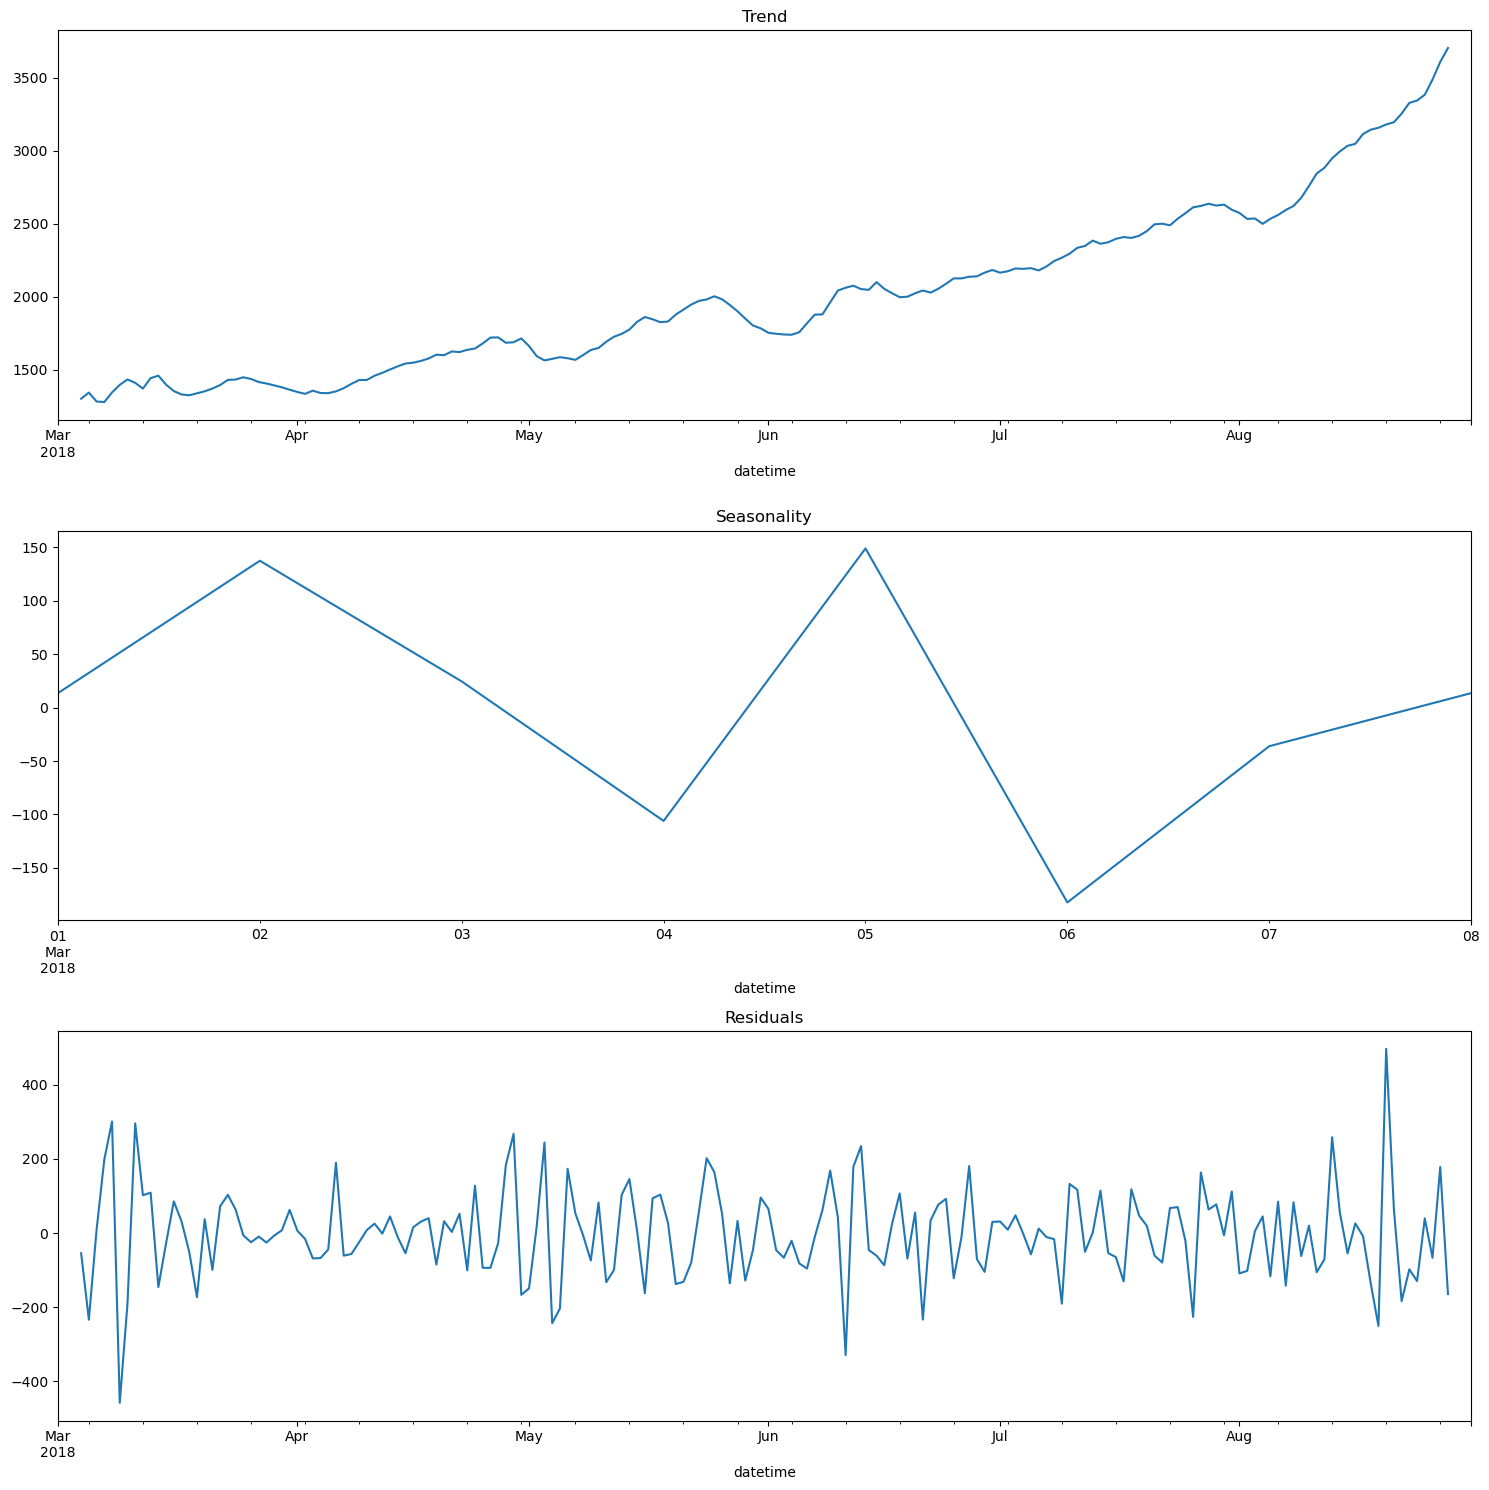

In [15]:
plt.figure(figsize=(6, 8))
plt.subplot(311)
decomposed_day.trend.plot(ax=plt.gca(), figsize=(15,15))
plt.title('Trend')
plt.subplot(312)
decomposed_day.seasonal['2018-03-01':'2018-03-08'].plot(ax=plt.gca(), figsize=(15,15))
plt.title('Seasonality')
plt.subplot(313)
decomposed_day.resid.plot(ax=plt.gca(), figsize=(15,15))
plt.title('Residuals')
plt.tight_layout()

Посмотрим остатки на разных отрезках, с периодичность в 2 месяца

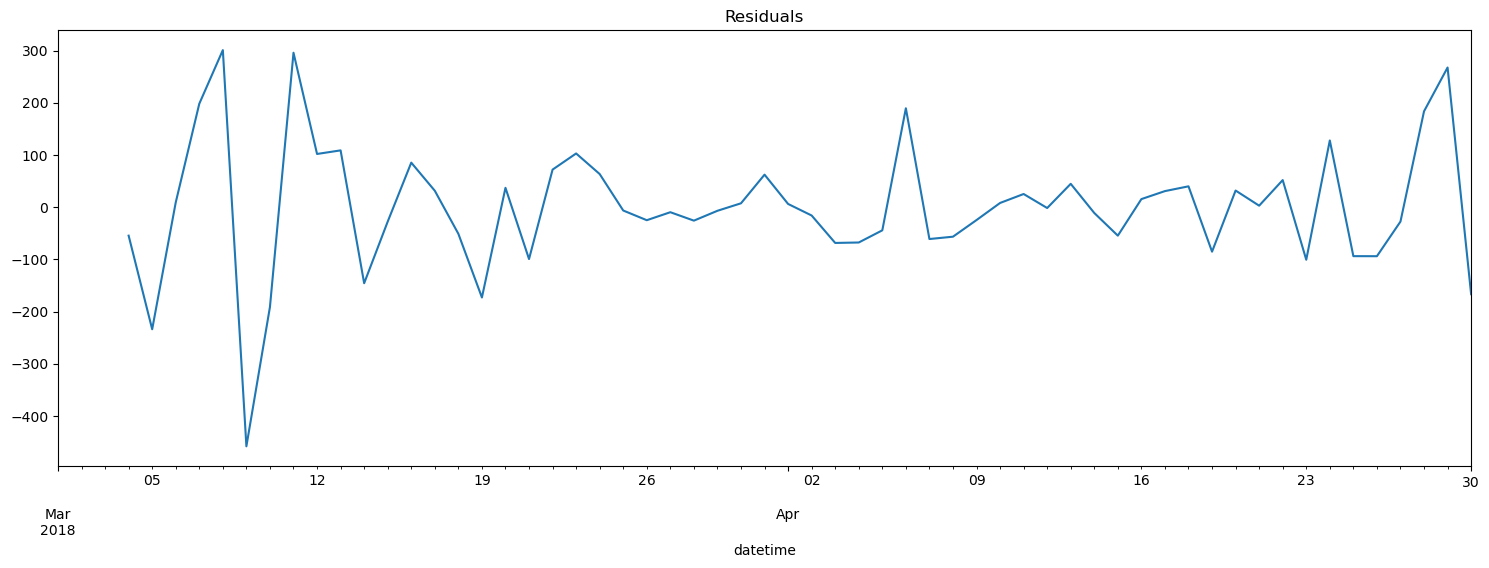

In [16]:
plt.figure(figsize=(6, 8))

plt.subplot(313)
decomposed_day.resid['2018-03-01':'2018-04-30'].plot(ax=plt.gca(), figsize=(15,15))
plt.title('Residuals')
plt.tight_layout()

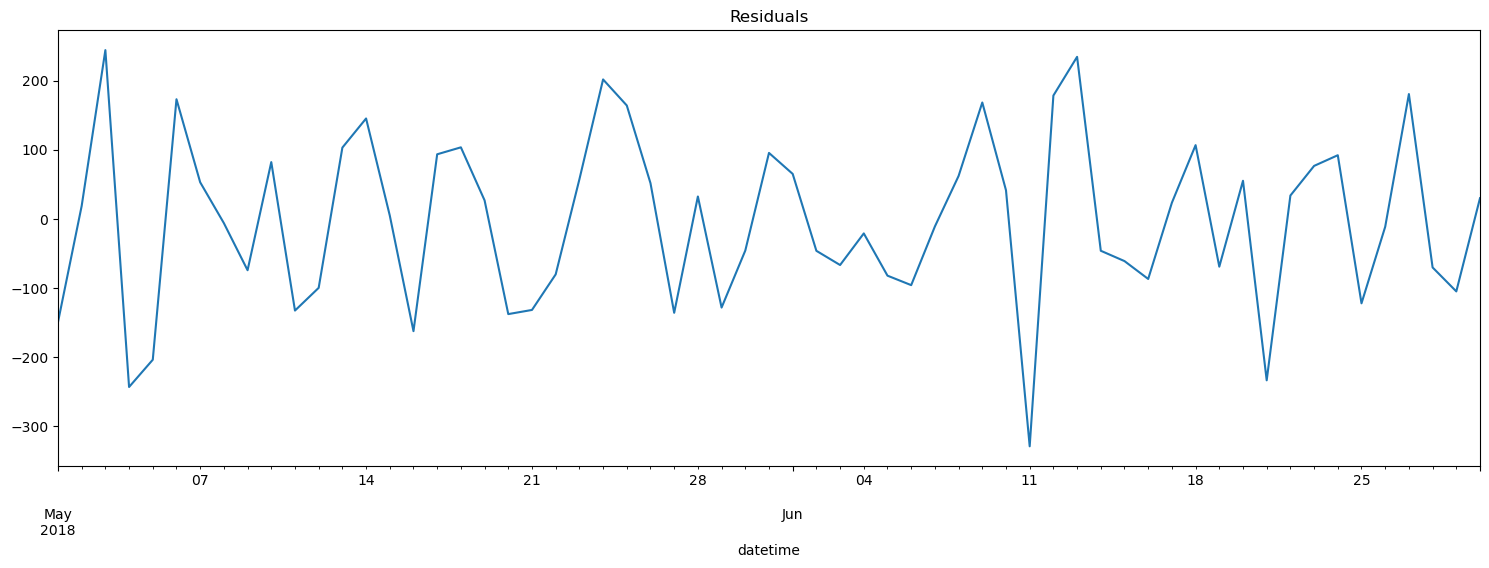

In [17]:
plt.figure(figsize=(6, 8))

plt.subplot(313)
decomposed_day.resid['2018-05-01':'2018-06-30'].plot(ax=plt.gca(), figsize=(15,15))
plt.title('Residuals')
plt.tight_layout()

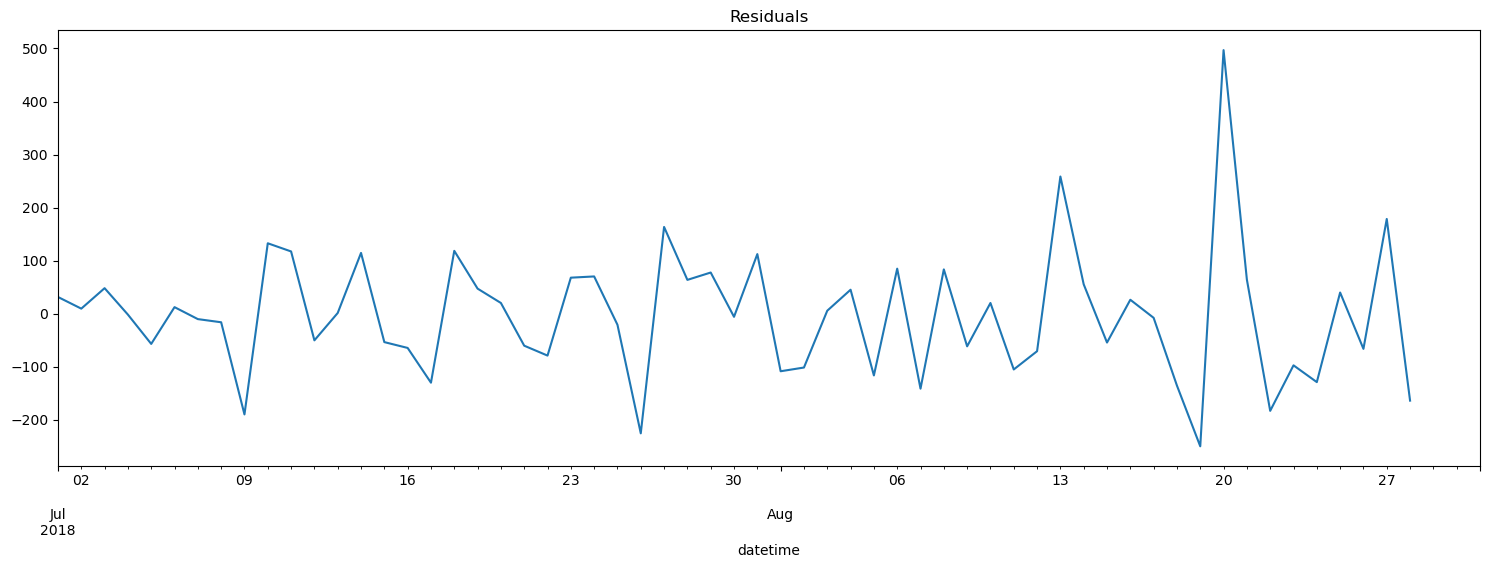

In [18]:
plt.figure(figsize=(6, 8))

plt.subplot(313)
decomposed_day.resid['2018-07-01':'2018-08-31'].plot(ax=plt.gca(), figsize=(15,15))
plt.title('Residuals')
plt.tight_layout()

### Выводы по разделу 2

1. Для имеющихся данных построили график скользящего среднего. Для наглядности "сглаживания" выбрали размер окна равный 30. По полученному графику установлено, что временной ряд не станционарный, так как у него меняется среднее значение 
2. С помощью функции `seasonal_decompose` из данных выделели тренд, сезонность и остаток, построили соответствующие графики. Из полученных графиков видно, что тренд указывает на увелечиние количества заказов, а сезонность указывает на то, что количество заказов такси увеличивается в вечернее и ночное время, а в утренние часы уменьшается
3. Для большей наглядности и справедливости выводов добавили ресемплирование временного ряда по дням и взяли отчетный период за 1 неделю. Из полученного графика сезонности видно, что заказов в начале недели и в выходные больше, чем например в середине недели. Это можно объяснить  тем, что в выходные клиенты чаще куда то летят чем например, в середине недели, поэтому вызывают такси до аэропорта.
4. Так же дополнительно посмотрели остатки с разбиением всего временного ряда на три по 2 месяца. Из графиков видно, что к концу ряда "остатков" к конця ряда меньше, а значит в тестовую выборку не попадет больше данных, которые сложно объяснить.


## Обучение

### Подготовка признаков

Для обучения и выбора лучшей модели из имеющегося датафрейма подготовим признаки

Напишем функцию для создания признаков

In [19]:
def make_features(data, max_lag, rolling_mean_size):
    data['hour'] = data.index.hour
    data['week'] = data.index.isocalendar().week
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()

make_features(data, 100, 100)
display(data.head(20))

,num_orders,hour,week,day,dayofweek,lag_1,lag_2,lag_3,lag_4,lag_5,...,lag_92,lag_93,lag_94,lag_95,lag_96,lag_97,lag_98,lag_99,lag_100,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-01 00:00:00,124,0,9,1,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,1,9,1,3,124.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,2,9,1,3,85.0,124.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,3,9,1,3,71.0,85.0,124.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,4,9,1,3,66.0,71.0,85.0,124.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 05:00:00,6,5,9,1,3,43.0,66.0,71.0,85.0,124.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 06:00:00,12,6,9,1,3,6.0,43.0,66.0,71.0,85.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 07:00:00,15,7,9,1,3,12.0,6.0,43.0,66.0,71.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 08:00:00,34,8,9,1,3,15.0,12.0,6.0,43.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


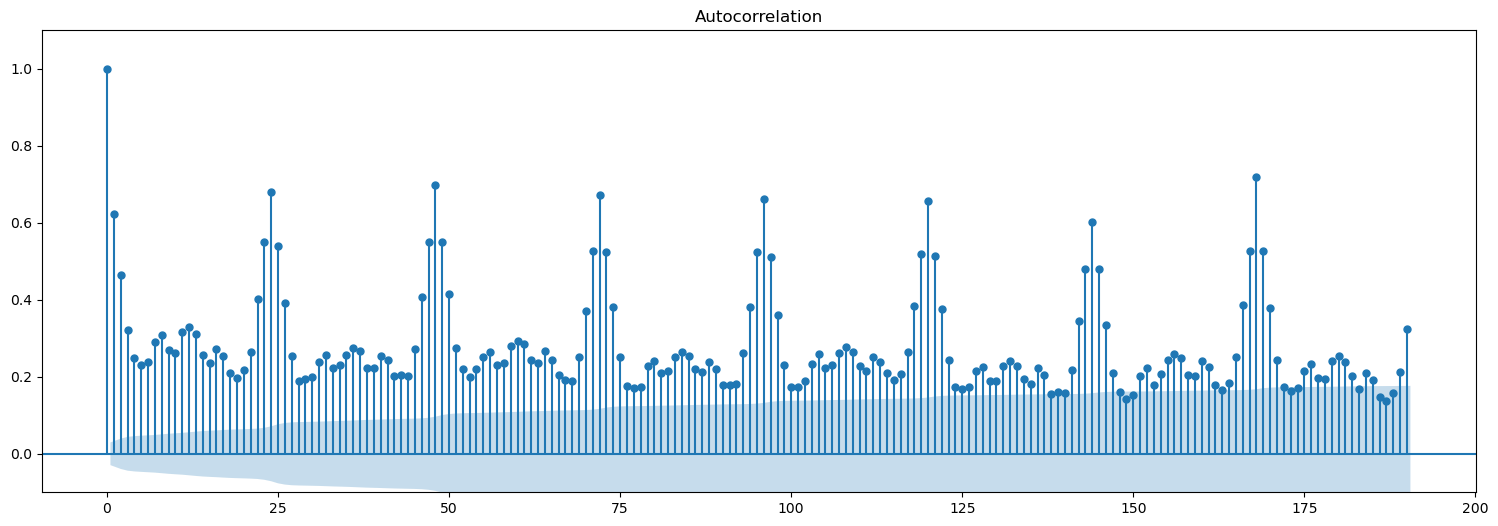

In [20]:
from statsmodels.graphics import tsaplots

taxi = pd.read_csv("C:/Users/kseni/OneDrive/Desktop/практика/датасеты/taxi.csv", index_col=[0], parse_dates=[0]).resample('1H').sum()
ts = taxi['num_orders']

fig = tsaplots.plot_acf(ts,lags= 190)
fig.set_size_inches(18.5, 6)
plt.ylim(-.1, 1.1)
plt.show() 

Разделим данные на тренировочную и тестовую выборку так. чтобы тестовая выборка составляла 10%

In [21]:
train, test = train_test_split(data, shuffle=False, test_size=0.1)
train.shape, test.shape

((3974, 106), (442, 106))

In [22]:
train = train.dropna() #удалим пропуски из обучающей выборки
train.isna().sum()
train.shape

(3874, 106)

Выделим из обучающей и тестовой выборок признаки и целевой признак

In [23]:
feature_train = train.drop(['num_orders'], axis=1)
target_train = train['num_orders']
feature_test = test.drop(['num_orders'], axis=1)
target_test = test['num_orders']

In [24]:
feature_train.shape, target_train.shape, feature_test.shape, target_test.shape

((3874, 105), (3874,), (442, 105), (442,))

### Подготовка функции для расчета RMSE

In [25]:
def rmse_func(target, predict):
    return mean_squared_error(target, predict) ** 0.5

Добавим `rmse_func` с использованием `make_scorer` для использования этой функции при обучении модели, для того, чтобы данная функция возвращала нам значения RMSE

In [26]:
function = make_scorer(rmse_func)

### Модель LinearRegression

Для определения качества модели линейной регрессии будем использовать кросс-валидацию для временных рядов с помощью `TimeSeriesSplit()`

In [27]:
%%time
cv = TimeSeriesSplit(n_splits=3).split(feature_train)
model_lr = LinearRegression() 
score_lr = cross_val_score(model_lr, feature_train, target_train, scoring=function, cv=cv)
#round(np.mean(-score_lr)**0.5, 2)
print('RMSE для модели линейной регрессии с кросс-валидацией:', min(score_lr))

RMSE для модели линейной регрессии с кросс-валидацией: 22.471870193925255
CPU times: total: 15.6 ms
Wall time: 97.9 ms


### Модель RandomForestRegressor

In [28]:
model = RandomForestRegressor()
param_search = { 
    'n_estimators': [20, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [i for i in range(5,15)]
}
tscv = TimeSeriesSplit(n_splits=10)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search, scoring = function)
gsearch.fit(feature_train, target_train)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_

In [29]:
print('Наилучшие параметры модели RandomForestRegressor:', gsearch.best_params_)

print('RMSE для модели RandomForestRegressor:', best_score)

Наилучшие параметры модели RandomForestRegressor: {'max_depth': 5, 'max_features': 'log2', 'n_estimators': 20}
RMSE для модели RandomForestRegressor: 27.416817058174228


### Модель DecisionTreeRegressor

In [30]:
import warnings #отключим предупреждения
warnings.filterwarnings("ignore")

In [31]:
model_dtr = DecisionTreeRegressor()
param_search_dtr = { 
    'min_samples_split': [20, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [i for i in range(5,15)]
}
tscv = TimeSeriesSplit(n_splits=5)
gsearch_dtr = GridSearchCV(estimator=model_dtr, cv=tscv, param_grid=param_search_dtr, scoring = function)
gsearch_dtr.fit(feature_train, target_train)
best_score_dtr = gsearch_dtr.best_score_
best_model_dtr = gsearch_dtr.best_estimator_

In [32]:
print('Наилучшие параметры модели DecisionTreeRegressor:', gsearch_dtr.best_params_)

print('RMSE для модели DecisionTreeRegressor:', best_score_dtr)

Наилучшие параметры модели DecisionTreeRegressor: {'max_depth': 6, 'max_features': 'log2', 'min_samples_split': 50}
RMSE для модели DecisionTreeRegressor: 33.29339915441315


### Выводы по разделу 3

1. Подготовили данные для обучения модели (подготовили признаки, разделили полученный датафрейм на обучающую и тестовую выборки)
2. Для анализа наилучшей модели выбрали три вида моделей: 

- LinearRegression
- RandomForestRegressor
- DecisionTreeRegressor

Качество моделей оценивали по показателю RMSE.
Получили, что:

- Для LinearRegression RMSE = 22.471870193925255
- Для RandomForestRegressor RMSE = 27.416817058174228
- Для DecisionTreeRegressor RMSE = 33.29339915441315

Таким образом получили, что наилучший показетель RMSE имеет модель LinearRegression. Поэтому проверку на тестовой выборке будем выполнять для этой модели


## Тестирование

### Обучение модели на тестовых данных

In [33]:
model_test = LinearRegression()
model_test.fit(feature_test, target_test)
prediction_test = model_test.predict(feature_test)

In [34]:
rmse_test = (mean_squared_error(target_test, prediction_test)) ** 0.5
print('RMSE для модели линейной регрессии:', rmse_test)

RMSE для модели линейной регрессии: 34.6415244833127


### Проверка качества прогноза

Далее проверим качества прогноза выбранной модели.
Воспользуемся двумя методами:
1. Все значения тестовой выборки предсказываются одним и тем же числом (константой).
2. Новое значение x(t) прогнозируется предыдущим значением ряда, то есть x(t-1).

In [35]:
pred_mean = np.ones(test.shape[0]) * train['num_orders'].mean() #1 способ
rmse_mean = mean_squared_error(test['num_orders'], pred_mean) ** 0.5
print("RMSE:", rmse_mean)

RMSE: 84.33764728516337


In [36]:
pred_previous = test.shift(fill_value=0) #2 способ
pred_previous.shape
pred_previous.iloc[0] = train.iloc[-1]
rmse_prev = mean_squared_error(test, pred_previous) ** 0.5
print("RMSE:", rmse_prev)

RMSE: 56.407537500736886


Сравним данные полученные из двух методов со значением RMSE для модели LinearRegression

In [37]:
min_mean_prev = min(rmse_mean, rmse_prev)

if min_mean_prev > rmse_test:
    print('Модель адекватна')
else:
    print('Модель неадекватна, подберите другие параметры')

Модель адекватна


## Итоговый вывод

На входе у нас были данные от компании «Чётенькое такси», которая обрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Нашей задачей было построить оптмальную модель для такого предсказания.

Исторические данные были предоставлены за период с 1 марта 2018 го по 31 августа 2018 года.

В ходе исследования были выполнены следующие шаги:

1. Подготовка данных.
- были выгружены необходимые библиотеки;
- проведена проверка хронолгического расположения данных;
- проведено ресемплирование данных по 1 часу;

2. Анализ данных
- Для имеющихся данных построили график скользящего среднего. Для наглядности "сглаживания" выбрали размер окна равный 30. По полученному графику установлено, что временной ряд не станционарный, так как у него меняется среднее значение 
- С помощью функции `seasonal_decompose` из данных выделели тренд, сезонность и остаток, построили соответствующие графики. Из полученных графиков видно, что тренд указывает на увелечиние количества заказов, а сезонность указывает на то, что количество заказов такси увеличивается в вечернее и ночное время, а в утренние часы уменьшается

3. Обучение
- для обучения моделей с помощью написанной функции подготовили по имеющейся таблице признаки. Данные разделили на обучающую и тестовую выборки, выделели признаки и целевой признак.

- в качестве исследоуемых моделей выбрали модели LinearRegression, RandomForestRegressor, DecisionTreeRegressor. Получили, что наилучшей моделью по показателю RMSE является модель LinearRegression

4. Тестирование

- провели проверку модели на тестовой выборке, получили значение RMSE = 34.6415244833127
- провели оценку качества прогноза с помощью двух методов и путем сравнение, установили, что наша модель адекватна и имеет значение RMSE лучшее по сравнению с константной моделью и моделью предыдущего значения


